<a href="https://colab.research.google.com/github/Pkodeboy/64061_AML/blob/main/Assignment%201/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# The code above imports various libraries and packages that will be used in your script.
# - Numpy and Pandas for data manipulation.
# - Seaborn and Matplotlib for data visualization.
# - TensorFlow and Keras for deep learning tasks.# Import necessary packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import deep learning packages from TensorFlow and Keras
from tensorflow import keras
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout
from tensorflow.python import metrics
from keras.utils import plot_model


In [3]:
# Importing the IMDb dataset from TensorFlow Keras

from keras.datasets import imdb
# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]


17464789/17464789 [==============================] - 0s 0us/step


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [48]:
# Get the word index mapping
word_idx = imdb.get_word_index()

# Reversing the word indices back to words
reverse_word_idx = {value: key for key, value in word_idx.items()}

# Decode the review using list comprehension and the indices are offset because
# 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
review_decoded = " ".join([reverse_word_idx.get(i - 3, "?") for i in train_data[2]])

#Decoded review in words are
review_decoded




"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

Rewriting the data in 0 and 1's format as prepare text data for input into a neural network. Text data needs to be converted into a format that can be processed by a neural network.

We one-hot-encode each word in your vocabulary, representing each word as a binary vector where only one element (corresponding to the word's index) is 1, and all others are 0.
Each sequence is then represented as a matrix of one-hot vectors, which can be used as input to a neural network.




In [49]:
import numpy as np
# Define a function to vectorize sequences, converting them into one-hot encoded tensors.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

# Vectorize the training data using the defined function
x_train = vectorize_sequences(train_data)
# Vectorize the test data using the same function
x_test = vectorize_sequences(test_data)

# Convert the training labels to NumPy arrays and cast them to float32 data type
y_train = np.asarray(train_labels).astype("float32")
# Convert the test labels to NumPy arrays and cast them to float32 data type
y_test = np.asarray(test_labels).astype("float32")





In [50]:
#Splitting the training and validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [51]:

#Building the Neural Network

model = keras.Sequential([
    layers.Dense(16, activation="relu",input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#Compiling the Model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [52]:

# Summary of the Model
model.summary()




Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 16)                160016    
                                                                 
 dense_35 (Dense)            (None, 16)                272       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
#Training the model

imdb_mod = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/30
30/30 [==============================] - 2s 44ms/step - loss: 0.5421 - accuracy: 0.7790 - val_loss: 0.4266 - val_accuracy: 0.8492
Epoch 2/30
30/30 [==============================] - 0s 13ms/step - loss: 0.3404 - accuracy: 0.8917 - val_loss: 0.3298 - val_accuracy: 0.8777
Epoch 3/30
30/30 [==============================] - 0s 15ms/step - loss: 0.2568 - accuracy: 0.9153 - val_loss: 0.2905 - val_accuracy: 0.8897
Epoch 4/30
30/30 [==============================] - 0s 14ms/step - loss: 0.2045 - accuracy: 0.9319 - val_loss: 0.2778 - val_accuracy: 0.8890
Epoch 5/30
30/30 [==============================] - 0s 14ms/step - loss: 0.1731 - accuracy: 0.9421 - val_loss: 0.2770 - val_accuracy: 0.8882
Epoch 6/30
30/30 [==============================] - 0s 14ms/step - loss: 0.1444 - accuracy: 0.9539 - val_loss: 0.2837 - val_accuracy: 0.8855
Epoch 7/30
30/30 [==============================] - 0s 14ms/step - loss: 0.1226 - accuracy: 0.9613 - val_loss: 0.3021 - val_accuracy: 0.8803
Epoch 8/30
30

In [55]:
#(.history) has a dictionary of values related to the loss and accuracy during the training and validation calling it out specifically to visualize the plots

imdb_dict = imdb_mod.history



Visualizing the training and validation loss over epochs to help us analyze the training progress of your machine learning model. We would want to see the training loss decrease over epochs, while the validation loss should ideally follow a similar trend. If the training loss keeps decreasing but the validation loss starts to increase, it may indicate overfitting, which is something we'd want to address in our model training.

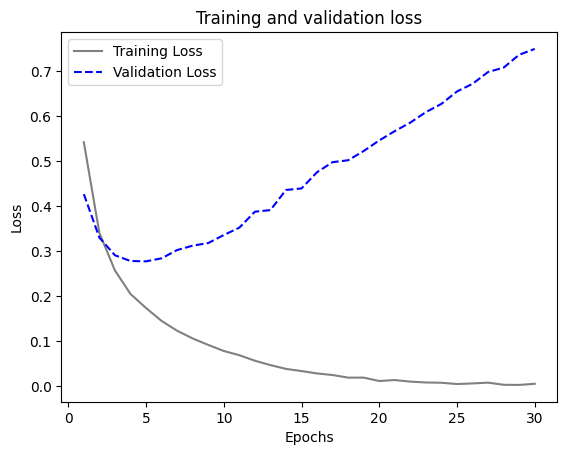

In [56]:

#Training and Validation Loss
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training Loss")
plt.plot(epochs, val_loss_values, color="blue",linestyle="dashed", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

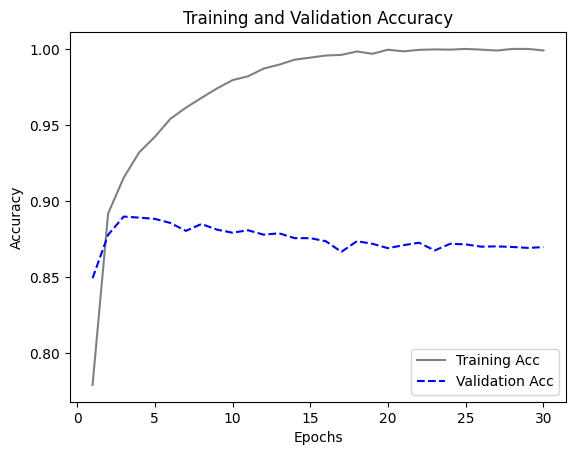

In [57]:

#Plotting training and validation loss during the training of a machine learning model

acc_values = imdb_dict["accuracy"]
val_accuracy = imdb_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs,acc_values,color='grey',label="Training Acc")
plt.plot(epochs,val_accuracy,color='blue', linestyle='dashed',label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the loss graph provided, it appears that the ideal number of epochs for training our model is "4." This choice is supported by the observation that the validation loss begins to significantly increase after the 4th epoch. Additionally, when examining the "Accuracy Plot," it becomes evident that the model achieves its highest accuracy at the 4th epoch as well.

**Retraining the model with 4 Epochs**

In [58]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_1 = model.fit(x_train,
                       y_train,
                       epochs=4,
                       batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4746 - accuracy: 0.8037
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2801 - accuracy: 0.8999
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2176 - accuracy: 0.9217
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1834 - accuracy: 0.9332


In [59]:
results_mod1 = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.8849


The accuracy on the test set for the  model built resulted in 88.49%.


**Model - 2 with imdb_mod_2 - 1 Hidden Layer, 64 Nodes, activation - tanh, optimizer - rmsprop, loss - mse**

In [60]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_2 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 66ms/step - loss: 0.1618 - accuracy: 0.7711 - val_loss: 0.1110 - val_accuracy: 0.8691
Epoch 2/50
30/30 [==============================] - 2s 51ms/step - loss: 0.0956 - accuracy: 0.8846 - val_loss: 0.0935 - val_accuracy: 0.8793
Epoch 3/50
30/30 [==============================] - 1s 26ms/step - loss: 0.0751 - accuracy: 0.9097 - val_loss: 0.0867 - val_accuracy: 0.8862
Epoch 4/50
30/30 [==============================] - 1s 22ms/step - loss: 0.0663 - accuracy: 0.9187 - val_loss: 0.0885 - val_accuracy: 0.8802
Epoch 5/50
30/30 [==============================] - 1s 23ms/step - loss: 0.0585 - accuracy: 0.9293 - val_loss: 0.0837 - val_accuracy: 0.8847
Epoch 6/50
30/30 [==============================] - 1s 22ms/step - loss: 0.0511 - accuracy: 0.9397 - val_loss: 0.0888 - val_accuracy: 0.8779
Epoch 7/50
30/30 [==============================] - 1s 22ms/step - loss: 0.0467 - accuracy: 0.9457 - val_loss: 0.0836 - val_accuracy: 0.8855
Epoch 8/50
30

In [61]:
imdb_dict_2 = imdb_mod_2.history


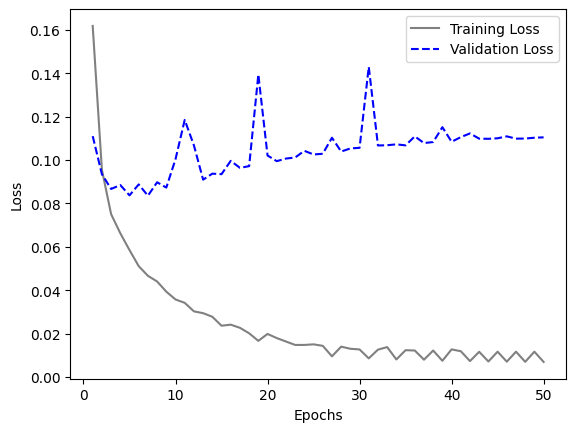

In [62]:
#Training and Validation Loss

loss = imdb_dict_2['loss']
val_loss = imdb_dict_2['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color= "grey", label= "Training Loss")
plt.plot(epochs, val_loss, color= "blue",linestyle= "dashed", label= "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

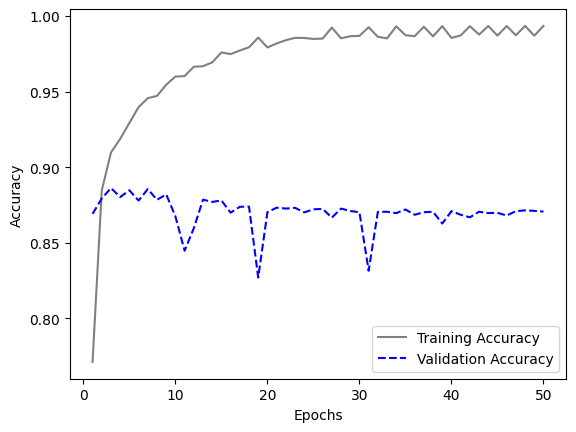

In [63]:
#Training and Validation Accuracy

accuracy = imdb_dict_2['accuracy']
validation_accuracy = imdb_dict_2['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color="grey",label="Training Accuracy")
plt.plot(epochs,validation_accuracy, color= "blue", linestyle="dashed",label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the loss graph provided, it appears that the ideal number of epochs for training our model is "3." This choice is supported by the observation that the validation loss begins to significantly increase after the 3th epoch. Additionally, when examining the "Accuracy Plot," it becomes evident that the model achieves its highest accuracy at the 3th epoch as well.

In [64]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_3 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)

Epoch 1/3
49/49 [==============================] - 1s 15ms/step - loss: 0.1464 - accuracy: 0.8073
Epoch 2/3
49/49 [==============================] - 1s 15ms/step - loss: 0.0871 - accuracy: 0.8924
Epoch 3/3
49/49 [==============================] - 1s 15ms/step - loss: 0.0724 - accuracy: 0.9096


In [65]:

results_mod2 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.0997 - accuracy: 0.8620


The accuracy on the test set for the model built resulted in 86.20%.

**Model - 3 imdb_mod_4 - 3 Hidden Layers, 64 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, regularisation - l2 (0.001)**

In [66]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_4 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data = (x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 52ms/step - loss: 0.7601 - accuracy: 0.7287 - val_loss: 0.5911 - val_accuracy: 0.8405
Epoch 2/50
30/30 [==============================] - 1s 22ms/step - loss: 0.5000 - accuracy: 0.8769 - val_loss: 0.5431 - val_accuracy: 0.8423
Epoch 3/50
30/30 [==============================] - 1s 27ms/step - loss: 0.4132 - accuracy: 0.9062 - val_loss: 0.4419 - val_accuracy: 0.8874
Epoch 4/50
30/30 [==============================] - 1s 22ms/step - loss: 0.3515 - accuracy: 0.9251 - val_loss: 0.4294 - val_accuracy: 0.8859
Epoch 5/50
30/30 [==============================] - 1s 22ms/step - loss: 0.3109 - accuracy: 0.9356 - val_loss: 0.4986 - val_accuracy: 0.8642
Epoch 6/50
30/30 [==============================] - 1s 22ms/step - loss: 0.2901 - accuracy: 0.9414 - val_loss: 0.4178 - val_accuracy: 0.8825
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 0.2334 - accuracy: 0.9661 - val_loss: 0.4973 - val_accuracy: 0.8668
Epoch 8/50
30

In [67]:
imdb_dict_4 = imdb_mod_4.history

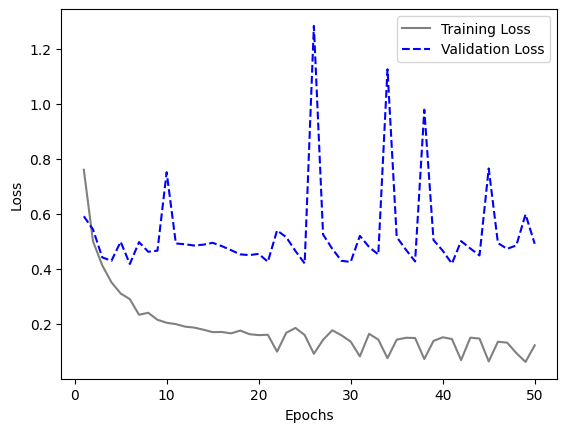

In [68]:
#Training and Validation Loss

loss = imdb_dict_4['loss']
val_loss = imdb_dict_4['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

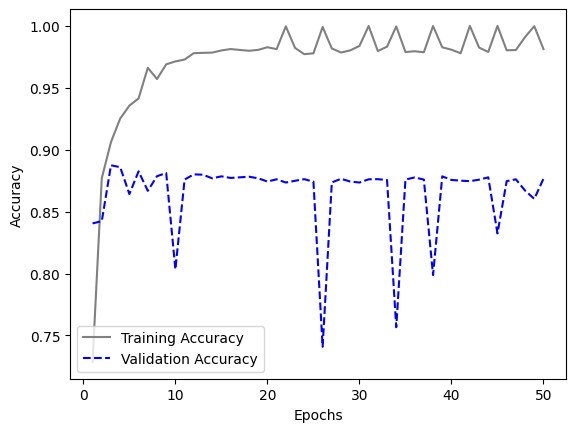

In [69]:
#Training and Validation Accuracy

accuracy = imdb_dict_4['accuracy']
val_accuracy = imdb_dict_4['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the loss graph provided, it appears that the ideal number of epochs for training our model is "3." This choice is supported by the observation that the validation loss begins to significantly increase after the 3th epoch. Additionally, when examining the "Accuracy Plot," it becomes evident that the model achieves its highest accuracy at the 3th epoch as well.

In [70]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_5 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)


Epoch 1/3
49/49 [==============================] - 1s 16ms/step - loss: 0.6713 - accuracy: 0.7846
Epoch 2/3
49/49 [==============================] - 1s 16ms/step - loss: 0.4332 - accuracy: 0.8938
Epoch 3/3
49/49 [==============================] - 1s 16ms/step - loss: 0.3560 - accuracy: 0.9134


In [71]:
results_mod3 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4889 - accuracy: 0.8521


The accuracy on the test set for the third model built resulted in 85.21%.

**Model - 4 imdb_mod_6 - 2 Hidden Layers, 64 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout - 0.5.**


In [72]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_6 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=256,
                       validation_data=(x_val,y_val))

Epoch 1/50
59/59 [==============================] - 2s 31ms/step - loss: 0.4940 - accuracy: 0.7688 - val_loss: 0.3203 - val_accuracy: 0.8733
Epoch 2/50
59/59 [==============================] - 1s 15ms/step - loss: 0.2914 - accuracy: 0.8911 - val_loss: 0.2715 - val_accuracy: 0.8884
Epoch 3/50
59/59 [==============================] - 1s 15ms/step - loss: 0.2128 - accuracy: 0.9201 - val_loss: 0.2864 - val_accuracy: 0.8861
Epoch 4/50
59/59 [==============================] - 1s 15ms/step - loss: 0.1699 - accuracy: 0.9385 - val_loss: 0.2902 - val_accuracy: 0.8892
Epoch 5/50
59/59 [==============================] - 1s 15ms/step - loss: 0.1344 - accuracy: 0.9519 - val_loss: 0.3422 - val_accuracy: 0.8849
Epoch 6/50
59/59 [==============================] - 1s 14ms/step - loss: 0.1041 - accuracy: 0.9653 - val_loss: 0.3488 - val_accuracy: 0.8867
Epoch 7/50
59/59 [==============================] - 1s 14ms/step - loss: 0.0812 - accuracy: 0.9729 - val_loss: 0.4151 - val_accuracy: 0.8843
Epoch 8/50
59

In [73]:

imdb_dict_6 = imdb_mod_6.history


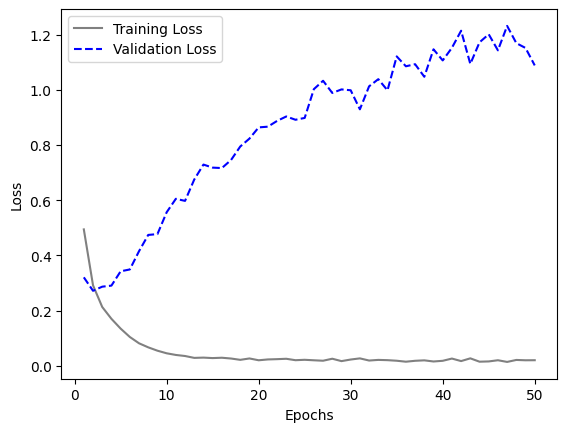

In [74]:

#Training and Validation Loss

loss = imdb_dict_6['loss']
val_loss = imdb_dict_6['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

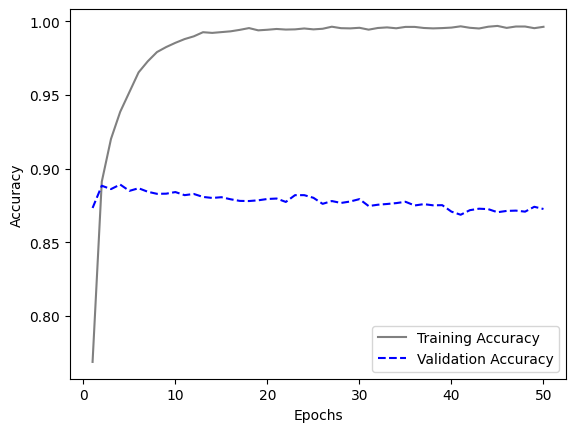

In [75]:
#Training and Validation Accuracy

accuracy = imdb_dict_6['accuracy']
val_accuracy = imdb_dict_6['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Based on the loss graph provided, it appears that the ideal number of epochs for training our model is "3." This choice is supported by the observation that the validation loss begins to significantly increase after the 3th epoch. Additionally, when examining the "Accuracy Plot," it becomes evident that the model achieves its highest accuracy at the 3th epoch as well.



**Back Propagation - Retrain the model with 3 epochs**

In [76]:

model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_7 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=256)




Epoch 1/3
98/98 [==============================] - 2s 11ms/step - loss: 0.4515 - accuracy: 0.7906
Epoch 2/3
98/98 [==============================] - 1s 11ms/step - loss: 0.2683 - accuracy: 0.8980
Epoch 3/3
98/98 [==============================] - 1s 11ms/step - loss: 0.2127 - accuracy: 0.9202


In [77]:
results_mod4 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.8840


The accuracy on the test set for the fourth model built resulted in 88.40%

**Model - 5 imdb_mod_8 - 1 Hidden Layer, 32 Nodes, activation - tanh, optimizer - adam, loss - mse, dropout - 0.3.**


In [78]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_8 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 44ms/step - loss: 0.1544 - accuracy: 0.7973 - val_loss: 0.1061 - val_accuracy: 0.8728
Epoch 2/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0781 - accuracy: 0.9143 - val_loss: 0.0892 - val_accuracy: 0.8894
Epoch 3/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0582 - accuracy: 0.9398 - val_loss: 0.0853 - val_accuracy: 0.8888
Epoch 4/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0460 - accuracy: 0.9559 - val_loss: 0.0841 - val_accuracy: 0.8874
Epoch 5/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0376 - accuracy: 0.9665 - val_loss: 0.0843 - val_accuracy: 0.8850
Epoch 6/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0317 - accuracy: 0.9737 - val_loss: 0.0851 - val_accuracy: 0.8834
Epoch 7/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0263 - accuracy: 0.9802 - val_loss: 0.0865 - val_accuracy: 0.8819
Epoch 8/50
30

In [79]:
imdb_dict_8 = imdb_mod_8.history


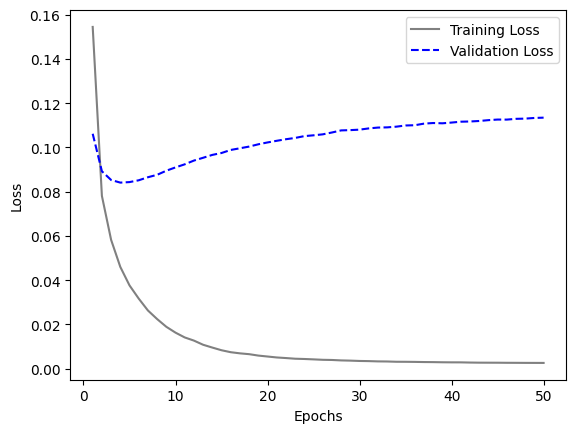

In [80]:
#Training and Validation Loss

loss = imdb_dict_8['loss']
val_loss = imdb_dict_8['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

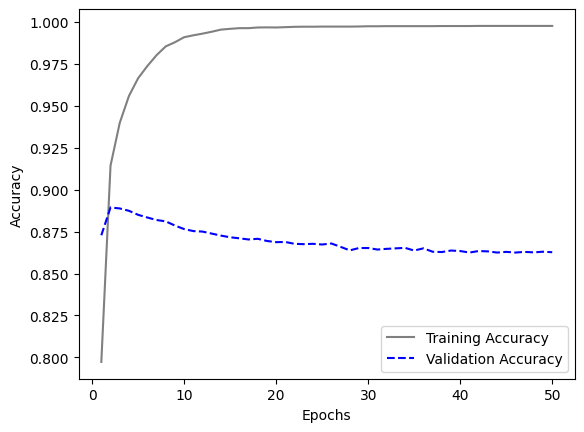

In [81]:
#Training and Validation Accuracy

accuracy = imdb_dict_8['accuracy']
val_accuracy = imdb_dict_8['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the above loss graph we can select the right number of epochs to be "5" because the validation loss starts to take a spike, after the 5th Epoch.We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 5th Epoch.


**Back Propagation - Retrain the model with 5 epochs**

In [82]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_9 = model.fit(x_train,
                       y_train,
                       epochs=5,
                       batch_size=512)

Epoch 1/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1399 - accuracy: 0.8250
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0733 - accuracy: 0.9163
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0564 - accuracy: 0.9363
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0463 - accuracy: 0.9498
Epoch 5/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0392 - accuracy: 0.9597


In [83]:
results_mod5 = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.8808


The accuracy on the test set for the fifth model built resulted in 88.08

**Model - 6 imdb_mod_10 - 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout - 0.5.**


In [84]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_10 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=30,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/30
30/30 [==============================] - 2s 42ms/step - loss: 0.6445 - accuracy: 0.6178 - val_loss: 0.5316 - val_accuracy: 0.8424
Epoch 2/30
30/30 [==============================] - 0s 13ms/step - loss: 0.5212 - accuracy: 0.7545 - val_loss: 0.4142 - val_accuracy: 0.8590
Epoch 3/30
30/30 [==============================] - 0s 13ms/step - loss: 0.4331 - accuracy: 0.8149 - val_loss: 0.3486 - val_accuracy: 0.8795
Epoch 4/30
30/30 [==============================] - 0s 13ms/step - loss: 0.3687 - accuracy: 0.8575 - val_loss: 0.3077 - val_accuracy: 0.8855
Epoch 5/30
30/30 [==============================] - 0s 13ms/step - loss: 0.3188 - accuracy: 0.8832 - val_loss: 0.2843 - val_accuracy: 0.8877
Epoch 6/30
30/30 [==============================] - 0s 14ms/step - loss: 0.2747 - accuracy: 0.9025 - val_loss: 0.2939 - val_accuracy: 0.8769
Epoch 7/30
30/30 [==============================] - 0s 15ms/step - loss: 0.2515 - accuracy: 0.9149 - val_loss: 0.2749 - val_accuracy: 0.8921
Epoch 8/30
30

In [85]:

imdb_dict_10 = imdb_mod_10.history

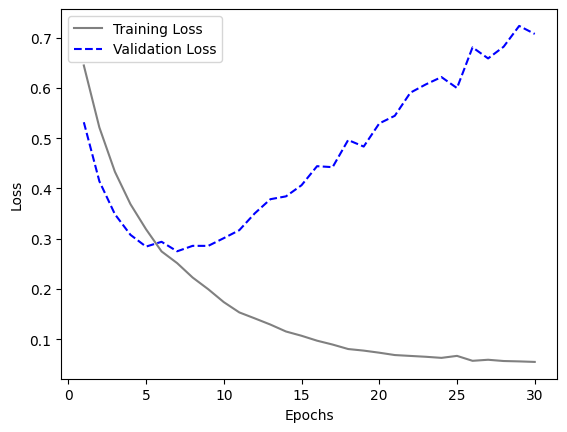

In [86]:

#Training and Validation Loss

loss=imdb_dict_10['loss']
val_loss=imdb_dict_10['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

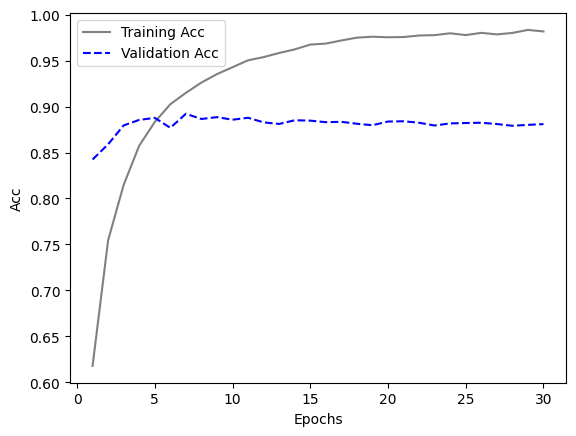

In [87]:
#Training and Validaiton Accuracy

accuracy=imdb_dict_10['accuracy']
val_accuracy=imdb_dict_10['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


From the above loss graph we can select the right number of epochs to be "7" because the validation loss starts to take a spike, after the 7th Epoch. We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 7th Epoch.


**Back Propagation - Retrain the model with 7 epochs**

In [88]:

model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_11 = model.fit(x_train,
                        y_train,
                        epochs=7,
                        batch_size=512)

Epoch 1/7
49/49 [==============================] - 1s 9ms/step - loss: 0.6134 - accuracy: 0.6524
Epoch 2/7
49/49 [==============================] - 0s 9ms/step - loss: 0.4583 - accuracy: 0.8000
Epoch 3/7
49/49 [==============================] - 0s 9ms/step - loss: 0.3711 - accuracy: 0.8562
Epoch 4/7
49/49 [==============================] - 0s 9ms/step - loss: 0.3191 - accuracy: 0.8845
Epoch 5/7
49/49 [==============================] - 0s 10ms/step - loss: 0.2780 - accuracy: 0.9013
Epoch 6/7
49/49 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.9159
Epoch 7/7
49/49 [==============================] - 0s 9ms/step - loss: 0.2200 - accuracy: 0.9247


In [89]:

results_mod6 = model.evaluate(x_test,y_test)


782/782 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.8852



The accuracy on the test set for the sixth model built resulted in 88.52%.


**Model - 7 imdb_mod_12 - 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout - 0.4.**


In [90]:

model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_12 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.6180 - accuracy: 0.6694 - val_loss: 0.5078 - val_accuracy: 0.8435
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4770 - accuracy: 0.8048 - val_loss: 0.4188 - val_accuracy: 0.8581
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3925 - accuracy: 0.8497 - val_loss: 0.3327 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3302 - accuracy: 0.8842 - val_loss: 0.2980 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2783 - accuracy: 0.9031 - val_loss: 0.2836 - val_accuracy: 0.8911
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2402 - accuracy: 0.9187 - val_loss: 0.2785 - val_accuracy: 0.8915
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2128 - accuracy: 0.9317 - val_loss: 0.2882 - val_accuracy: 0.8813
Epoch 8/20
30

In [91]:

imdb_dict_12 = imdb_mod_12.history

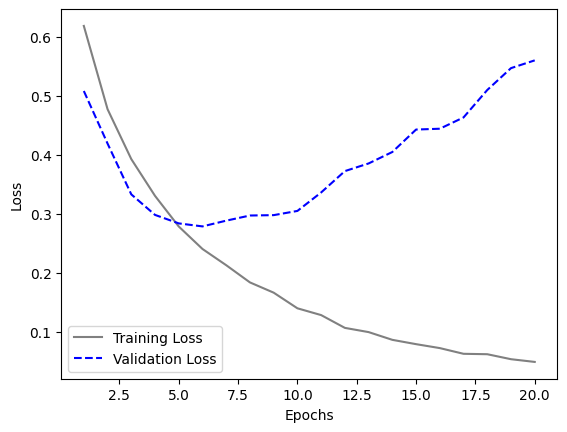

In [92]:
#Training and Validation Loss

loss=imdb_dict_12['loss']
val_loss=imdb_dict_12['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

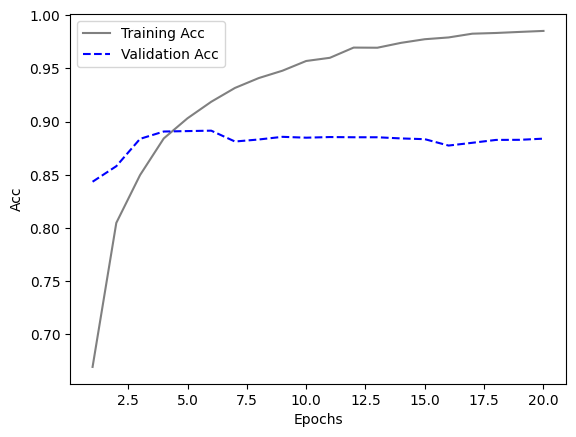

In [93]:
#Training and Validaiton Accuracy

accuracy=imdb_dict_12['accuracy']
val_accuracy=imdb_dict_12['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

From the above loss graph we can select the right number of epochs to be "4" because the validation loss starts to take a spike, after the 4th Epoch. We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 4th Epoch.


**Back Propagation - Retrain the model with 4 epochs**

In [94]:

model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_13 = model.fit(x_train,
                        y_train,
                        epochs=4,
                        batch_size=512)


Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.5732 - accuracy: 0.7172
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.3999 - accuracy: 0.8467
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.3145 - accuracy: 0.8853
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2611 - accuracy: 0.9098


In [95]:
results_mod7 = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.8899


The accuracy on the test set for the seventh model built resulted in 88.99%.




Assessing the best model
Loss Evaluation

Model1: loss: 0.2874 - accuracy: 0.8849

Model2: loss: 0.0997 - accuracy: 0.8620

Model3: loss: 0.4889 - accuracy: 0.8521

Model4: loss: 0.2898 - accuracy: 0.8840

Model5: loss: 0.0878 - accuracy: 0.8808

Model6: loss: 0.2978 - accuracy: 0.8852

Model7: loss: 0.2729 - accuracy: 0.8899

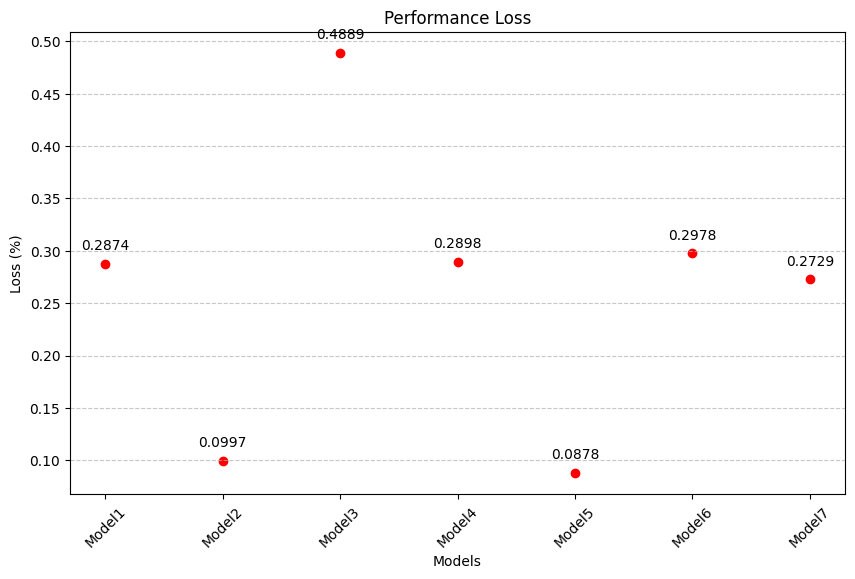

In [100]:
import matplotlib.pyplot as plt

Models = ('Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Model6', 'Model7')
Loss = (0.2874, 0.0997, 0.4889, 0.2898, 0.0878, 0.2978, 0.2729)

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
plt.scatter(Models, Loss, color='red', marker='o')  # Added marker='o' for better visibility
plt.title('Performance Loss')
plt.xlabel('Models')  # Added x-axis label for model names
plt.ylabel('Loss (%)')

# Adding data labels above each point
for (xi, yi) in zip(Models, Loss):
    plt.annotate(f'{yi:.4f}', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.show()


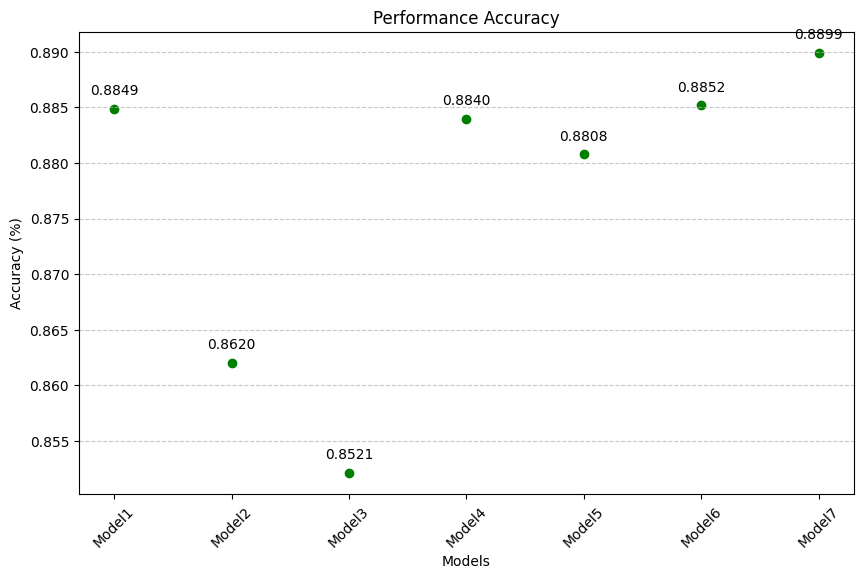

In [99]:



Accuracy = (0.8849, 0.8620, 0.8521, 0.8840, 0.8808, 0.8852, 0.8899)

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
plt.scatter(Models, Accuracy, color='green', marker='o')  # Added marker='o' for better visibility
plt.title('Performance Accuracy')
plt.xlabel('Models')  # Added x-axis label for model names
plt.ylabel('Accuracy (%)')

# Adding data labels above each point
for (xi, yi) in zip(Models, Accuracy):
    plt.annotate(f'{yi:.4f}', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.show()
